# Final Assignment - Statistical Significance

Implementing stage 5.

> `By: Yuval Rehsef`

> `ID: 314805045`

## Import Libraries
**`note: set the path to the results folder here.`**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scikit_posthocs import posthoc_mannwhitney

## Load results
`Load the results DataFrames.`

In [103]:
# imp_df = pd.read_csv('results/improved_VAT_results.csv')
imp_df = pd.read_csv('results/improved_VAT_results.csv')
vat_df = pd.read_csv('results/VAT_results.csv')

## Visualizing the results

`Display the results (mean`$\pm$`std)`

In [104]:
df_c = pd.DataFrame()
df_c['VAT'] = vat_df.groupby('Dataset Name').Accuracy.apply(lambda x: f'{round(x.mean(), 4)}' + u"\u00B1" + f'{round(x.std(), 4)}')
df_c['Improved VAT'] = imp_df.groupby('Dataset Name').Accuracy.apply(lambda x: f'{round(x.mean(), 4)}' + u"\u00B1" + f'{round(x.std(), 4)}')
df_c

,VAT,Improved VAT
Dataset Name,,
bank,0.8938±0.0062,0.8929±0.0066
blood,0.7794±0.0283,0.7914±0.0245
breast-cancer-wisc-diag,0.9701±0.0145,0.9719±0.0148
breast-tissue,0.5564±0.0883,0.5336±0.1292
cardiotocography-10clases,0.7277±0.0393,0.7328±0.0423
cardiotocography-3clases,0.8909±0.0131,0.8946±0.0136
congressional-voting,0.6067±0.0747,0.5952±0.0694
conn-bench-sonar-mines-rocks,0.8226±0.0973,0.8276±0.1004
conn-bench-vowel-deterding,0.8535±0.0341,0.8798±0.0331


`displaying bar plot of the results`


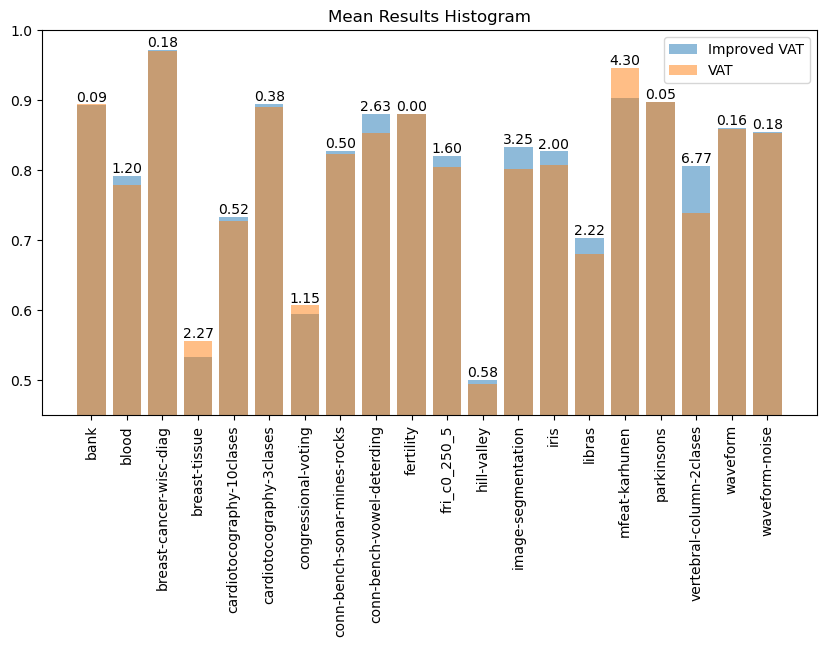

In [105]:
plt.figure(figsize = (10,5))
bar_imp = plt.bar(range(20), imp_df.groupby('Dataset Name').Accuracy.apply(np.mean).values, alpha=0.5)
bar_vat = plt.bar(range(20), vat_df.groupby('Dataset Name').Accuracy.apply(np.mean).values, alpha=0.5, )
plt.xticks(range(20), vat_df.groupby('Dataset Name').Accuracy.apply(np.mean).index)
plt.title('Mean Results Histogram')
plt.legend(['Improved VAT', 'VAT'])
plt.xticks(rotation=90)
plt.ylim(0.45,1)

df_c['imp_mean'] = imp_df.groupby('Dataset Name').Accuracy.apply(np.mean)
df_c['vat_mean'] = vat_df.groupby('Dataset Name').Accuracy.apply(np.mean)

df_c['distance'] = df_c.apply(lambda x: np.abs(x.imp_mean - x.vat_mean), axis=1)

for i, rect_imp in enumerate(bar_imp):
    rect_vat = bar_vat[i]
    height_imp = rect_imp.get_height()
    height_vat = rect_vat.get_height()
    height = max(height_imp, height_vat)
    plt.text(rect_imp.get_x() + rect_imp.get_width() / 2.0, height, f'{df_c.distance.iloc[i]*100:.2f}', ha='center', va='bottom')

plt.show()

## Mannwhitneyu Test

`Using Mannwhitneyu test to evaluate the models.`

In [117]:
stat_test_res = mannwhitneyu(df_c.imp_mean, df_c.vat_mean)
if stat_test_res[1] < 0.05:
    print('null-hypothesis rejected, the results are statistically significant')
    print(posthoc_mannwhitney([df_c.imp_mean, df_c.vat_mean]))
else:
    print('null-hypothesis is true, the results are not statistically significant')

null-hypothesis is true, the results are not statistically significant
